In [1]:
%pwd

'C:\\Users\\82106\\연습'

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

1. (막대그래프)신규년도별 개인신용카드 신규좌수 
2. (막대그래프)신규년도별 개인신용카드 신규좌수 (각 년도별 ~5월까지 해서 비교)
3. (다중막대차트) 20 ~ 22 각 월별 비교 막대그래프 
4. (원그래프) 20.1 ~ 22.5 신규좌수 중 각 상품별 비중 (파이차트)
5. (가로막대그래프) 22.1 ~ 22.5 Top5 신규상품
6. 1~5 subplot을 이용하여 종합 출력

In [4]:
df = pd.read_excel('data/jb_new_cr_p.xlsx', sheet_name='RAW')

In [5]:
df

,신규년도,신규월,상품명,신규좌수
0,2014,1,AUTO+,1
1,2014,1,J+,17
2,2014,1,JB시그니처,5
3,2014,1,JB아시아나클럽,5
4,2014,1,JB플래티늄,6
...,...,...,...,...
3990,2022,5,전주시복지,8
3991,2022,5,전통시장사랑,53
3992,2022,5,탄소융합기술원둘과넷,2
3993,2022,5,효사랑병원1st,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   신규년도    3995 non-null   int64 
 1   신규월     3995 non-null   int64 
 2   상품명     3995 non-null   object
 3   신규좌수    3995 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 125.0+ KB


In [9]:
df.columns

Index(['신규년도', '신규월', '상품명', '신규좌수'], dtype='object')

In [12]:
df['신규년도']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
3990    2022
3991    2022
3992    2022
3993    2022
3994    2022
Name: 신규년도, Length: 3995, dtype: int64

In [14]:
df_year = df.groupby('신규년도').sum()
df_year

,신규월,신규좌수
신규년도,,
2014,2220,51195
2015,2309,56155
2016,2789,50044
2017,3064,101348
2018,3555,68362
2019,3525,45756
2020,3705,46603
2021,3312,28305
2022,655,16449


In [15]:
del df_year['신규월']

In [16]:
df_year

,신규좌수
신규년도,
2014,51195
2015,56155
2016,50044
2017,101348
2018,68362
2019,45756
2020,46603
2021,28305
2022,16449


In [13]:
plt.rcParams['figure.figsize'] = [10,2]

<AxesSubplot:xlabel='신규년도'>

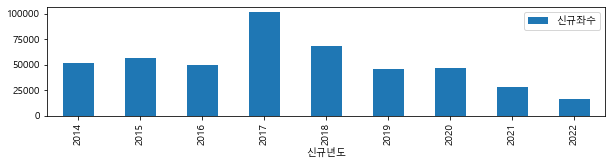

In [17]:
df_year.plot(kind='bar')

2. 각 년도 5월까지 막대그래프

In [21]:
fillter = (df['신규월'] <= 5)
df2 = df[fillter]
df2

,신규년도,신규월,상품명,신규좌수
0,2014,1,AUTO+,1
1,2014,1,J+,17
2,2014,1,JB시그니처,5
3,2014,1,JB아시아나클럽,5
4,2014,1,JB플래티늄,6
...,...,...,...,...
3990,2022,5,전주시복지,8
3991,2022,5,전통시장사랑,53
3992,2022,5,탄소융합기술원둘과넷,2
3993,2022,5,효사랑병원1st,1


In [22]:
df_year2 = df2.groupby('신규년도').sum()
df_year2

,신규월,신규좌수
신규년도,,
2014,444,23808
2015,448,26145
2016,524,21992
2017,591,17715
2018,645,25412
2019,735,19612
2020,760,19164
2021,679,12648
2022,655,16449


In [24]:
del df_year2['신규월']

In [25]:
df_year2

,신규좌수
신규년도,
2014,23808
2015,26145
2016,21992
2017,17715
2018,25412
2019,19612
2020,19164
2021,12648
2022,16449


In [26]:
plt.rcParams['figure.figsize'] = [10,2]

<AxesSubplot:xlabel='신규년도'>

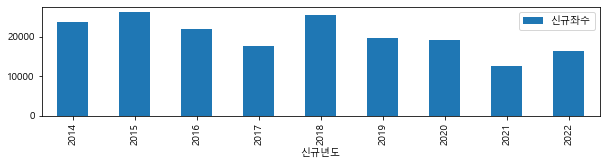

In [27]:
df_year2.plot(kind='bar')

3. 20 ~ 22년도 월별 다중막대그래프

In [56]:
fillter2 = ((df['신규년도'] >= 2020) & (df['신규월'] <= 5))
df2 = df[fillter2]
df2

,신규년도,신규월,상품명,신규좌수
2680,2020,1,1ST플래티늄,21
2681,2020,1,1ST플래티늄+,1
2682,2020,1,1stEDU,8
2683,2020,1,1stTRIPLE,589
2684,2020,1,1stTRIPLEPLATINUM,16
...,...,...,...,...
3990,2022,5,전주시복지,8
3991,2022,5,전통시장사랑,53
3992,2022,5,탄소융합기술원둘과넷,2
3993,2022,5,효사랑병원1st,1


In [57]:
df_mon = df2.groupby(['신규년도','신규월']).sum()
df_mon

신규좌수
신규년도 신규월      
2020 1    2834
     2    3311
     3    4418
     4    4175
     5    4426
2021 1    2699
     2    2217
     3    2867
     4    2664
     5    2201
2022 1    2275
     2    1906
     3    4211
     4    4240
     5    3817

In [60]:
df_mon

신규좌수
신규년도 신규월      
2020 1    2834
     2    3311
     3    4418
     4    4175
     5    4426
2021 1    2699
     2    2217
     3    2867
     4    2664
     5    2201
2022 1    2275
     2    1906
     3    4211
     4    4240
     5    3817

In [45]:
df_mon20 = df[df['신규년도']==2020]
df_mon20g = df_mon20.groupby(['신규년도','신규월']).sum()
df_mon20g

신규좌수
신규년도 신규월      
2020 1    2834
     2    3311
     3    4418
     4    4175
     5    4426
     6    4111
     7    3601
     8    2714
     9    5902
     10   4112
     11   4627
     12   2372

In [46]:
df_mon21 = df[df['신규년도']==2021]
df_mon21g = df_mon21.groupby(['신규년도','신규월']).sum()
df_mon21g

신규좌수
신규년도 신규월      
2021 1    2699
     2    2217
     3    2867
     4    2664
     5    2201
     6    2243
     7    2125
     8    1697
     9    3291
     10   2724
     11   2468
     12   1109

In [47]:
df_mon22 = df[df['신규년도']==2022]
df_mon22g = df_mon22.groupby(['신규년도','신규월']).sum()
df_mon22g

신규좌수
신규년도 신규월      
2022 1    2275
     2    1906
     3    4211
     4    4240
     5    3817

In [48]:
plt.rcParams['figure.figsize'] = [10,2]

<AxesSubplot:xlabel='신규년도,신규월'>

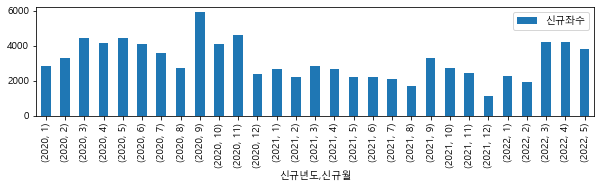

In [33]:
df_mon.plot(kind='bar')

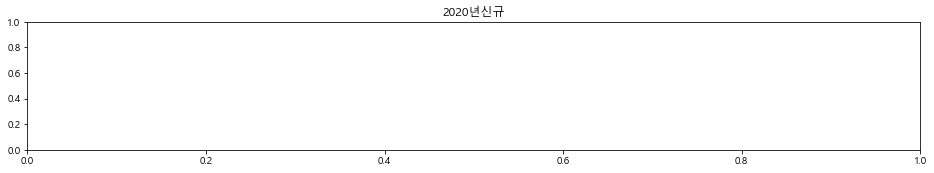

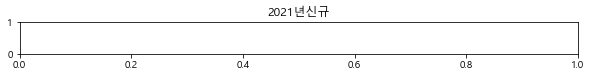

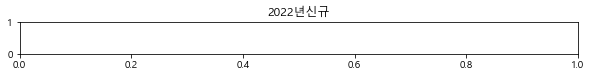

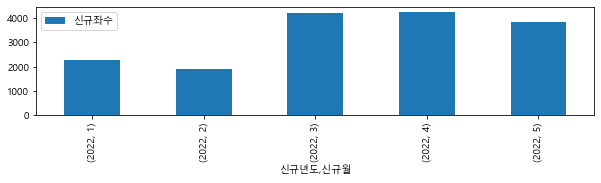

In [54]:
plt.figure(figsize=(16,8))

plt.subplot(311)
plt.title('2020년신규')
df_mon20g.plot(kind='bar')

plt.subplot(312)
plt.title('2021년신규')
df_mon21g.plot(kind='bar')

plt.subplot(313)
plt.title('2022년신규')
df_mon22g.plot(kind='bar')

plt.show()

4. (원그래프) 20.1 ~ 22.5 신규좌수 중 각 상품별 비중 (파이차트)

In [61]:
fillter2 = (df['신규년도'] >= 2020) 
df2 = df[fillter2]
df2

,신규년도,신규월,상품명,신규좌수
2680,2020,1,1ST플래티늄,21
2681,2020,1,1ST플래티늄+,1
2682,2020,1,1stEDU,8
2683,2020,1,1stTRIPLE,589
2684,2020,1,1stTRIPLEPLATINUM,16
...,...,...,...,...
3990,2022,5,전주시복지,8
3991,2022,5,전통시장사랑,53
3992,2022,5,탄소융합기술원둘과넷,2
3993,2022,5,효사랑병원1st,1


In [62]:
df2['상품명'].unique()

array(['1ST플래티늄', '1ST플래티늄+', '1stEDU', '1stTRIPLE', '1stTRIPLEPLATINUM',
       '1st', 'APRO1ST플래티늄', 'AUTO+', 'J+', 'JB아시아나클럽_개인', 'JB플래티늄',
       'Joil', 'Jshop', 'LG전자베스트케어', 'Life+', 'NEWAUTO+', 'SSG', 'SSG임직원',
       'e나라도움전용', '공무원1st', '공무원더오일', '공무원둘과넷', '공무직복지1st', '국민행복',
       '군산사랑', '둘과넷', '둘과넷ST', '부자되세요-TheOil', '새만금', '시설관리공단복지',
       '신세계면세점SSG', '신세계면세점SSG임직원', '신협1ST레드', '어린이집교직원1st', '에브리데이SSG',
       '에브리데이SSG임직원', '완주군복지', '원광대교직원1st', '의사회', '전북대병원복지1ST',
       '전북청년지원1st', '전주사회복지1st', '전주사회복지둘과넷', '전주시복지', '전통시장사랑',
       '효사랑병원1stEDU', '효사랑병원1st', '1st명문클럽', 'AUTOSAVE', 'JBPharm(청구할인)',
       'JB시그니처', 'Life+ST', 'Olleh', '군산시복지', '새만금개발공사1st', '신협1ST실버',
       '아이행복', '우석대1st', '천주교', '한국전통문화전당1st', '1ST(제휴)', 'JBPharm',
       '공무원1stEdu', '둘과넷(제휴)', '신세계TV쇼핑', '우석대1stEdu', '의사회1ST플래티늄',
       '전문인우대', '전북도민회', '탄소융합기술원1st', '한의사회', '부자되세요-쇼핑', '신협1ST그레이',
       '전북대병원복지JShop', '한의사회더오일', '1stlinkon', '내사랑전주', '해피포인트',
       '효사랑병원둘과넷', '전북대병원복

In [66]:
df_mer = df2.groupby('상품명').sum()
df_mer

,신규년도,신규월,신규좌수
상품명,,,
1ST(제휴),50521,159,1676
1ST플래티늄,58602,171,302
1ST플래티늄+,40416,124,39
1st,58602,171,7708
1stEDU,42431,127,67
...,...,...,...
한의사회더오일,2020,8,1
해피포인트,4041,14,2
효사랑병원1st,50515,154,122


In [71]:
df_mer2 = df_mer.drop(['신규년도','신규월'],axis=1)
df_mer2

,신규좌수
상품명,
1ST(제휴),1676
1ST플래티늄,302
1ST플래티늄+,39
1st,7708
1stEDU,67
...,...
한의사회더오일,1
해피포인트,2
효사랑병원1st,122


In [92]:
df_mer3 = df_mer2.stack()

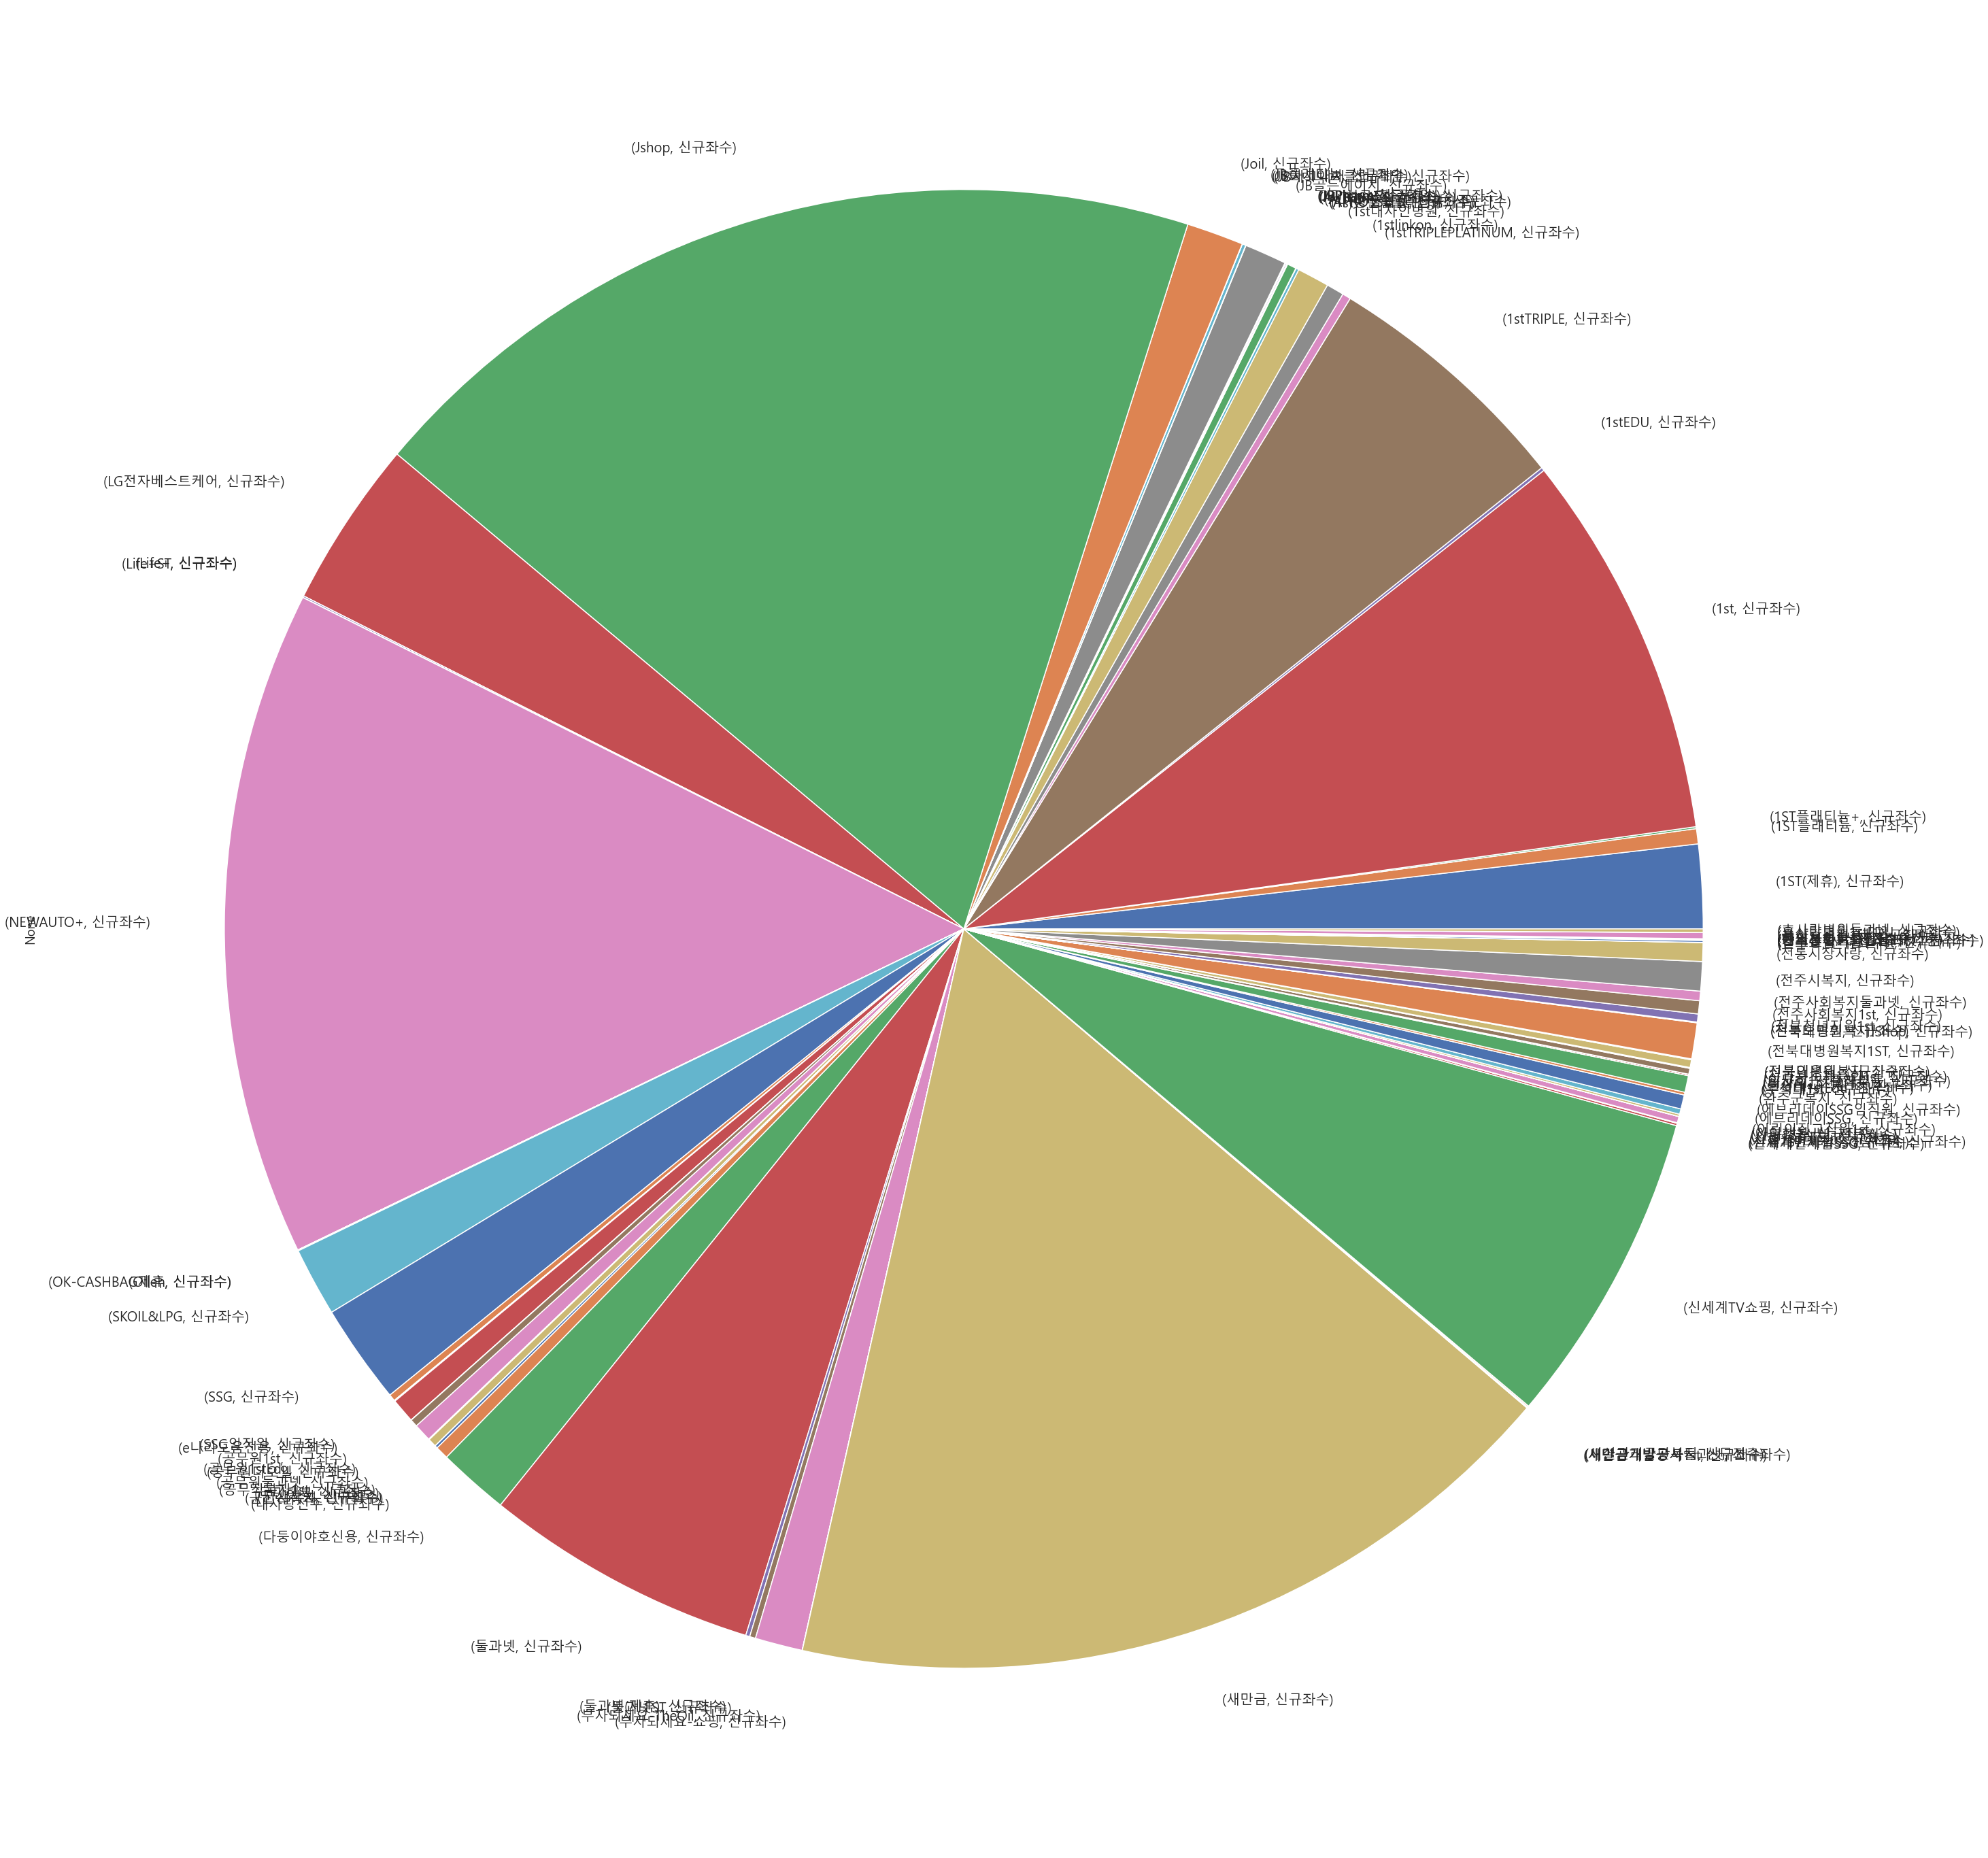

In [91]:
# import seaborn as sns
# sns.set(style="white", context="talk")
plt.rcParams['figure.figsize'] = [50,50]
# plt.pie(df_mer2)
df_mer3.plot(kind='pie',textprops={'fontsize': 20})
plt.show()

5. (가로막대그래프) 22.1 ~ 22.5 Top5 신규상품

In [94]:
fillter2 = (df['신규년도'] == 2022) 
df2 = df[fillter2]
df2

,신규년도,신규월,상품명,신규좌수
3781,2022,1,1ST플래티늄,13
3782,2022,1,1ST플래티늄+,1
3783,2022,1,1ST(제휴),394
3784,2022,1,1stTRIPLE,24
3785,2022,1,1stTRIPLEPLATINUM,4
...,...,...,...,...
3990,2022,5,전주시복지,8
3991,2022,5,전통시장사랑,53
3992,2022,5,탄소융합기술원둘과넷,2
3993,2022,5,효사랑병원1st,1


In [95]:
df_mer2 = df_mer.drop(['신규년도','신규월'],axis=1)
df_mer2

,신규좌수
상품명,
1ST(제휴),1676
1ST플래티늄,302
1ST플래티늄+,39
1st,7708
1stEDU,67
...,...
한의사회더오일,1
해피포인트,2
효사랑병원1st,122


In [99]:
df_mer3 = df_mer2.stack()

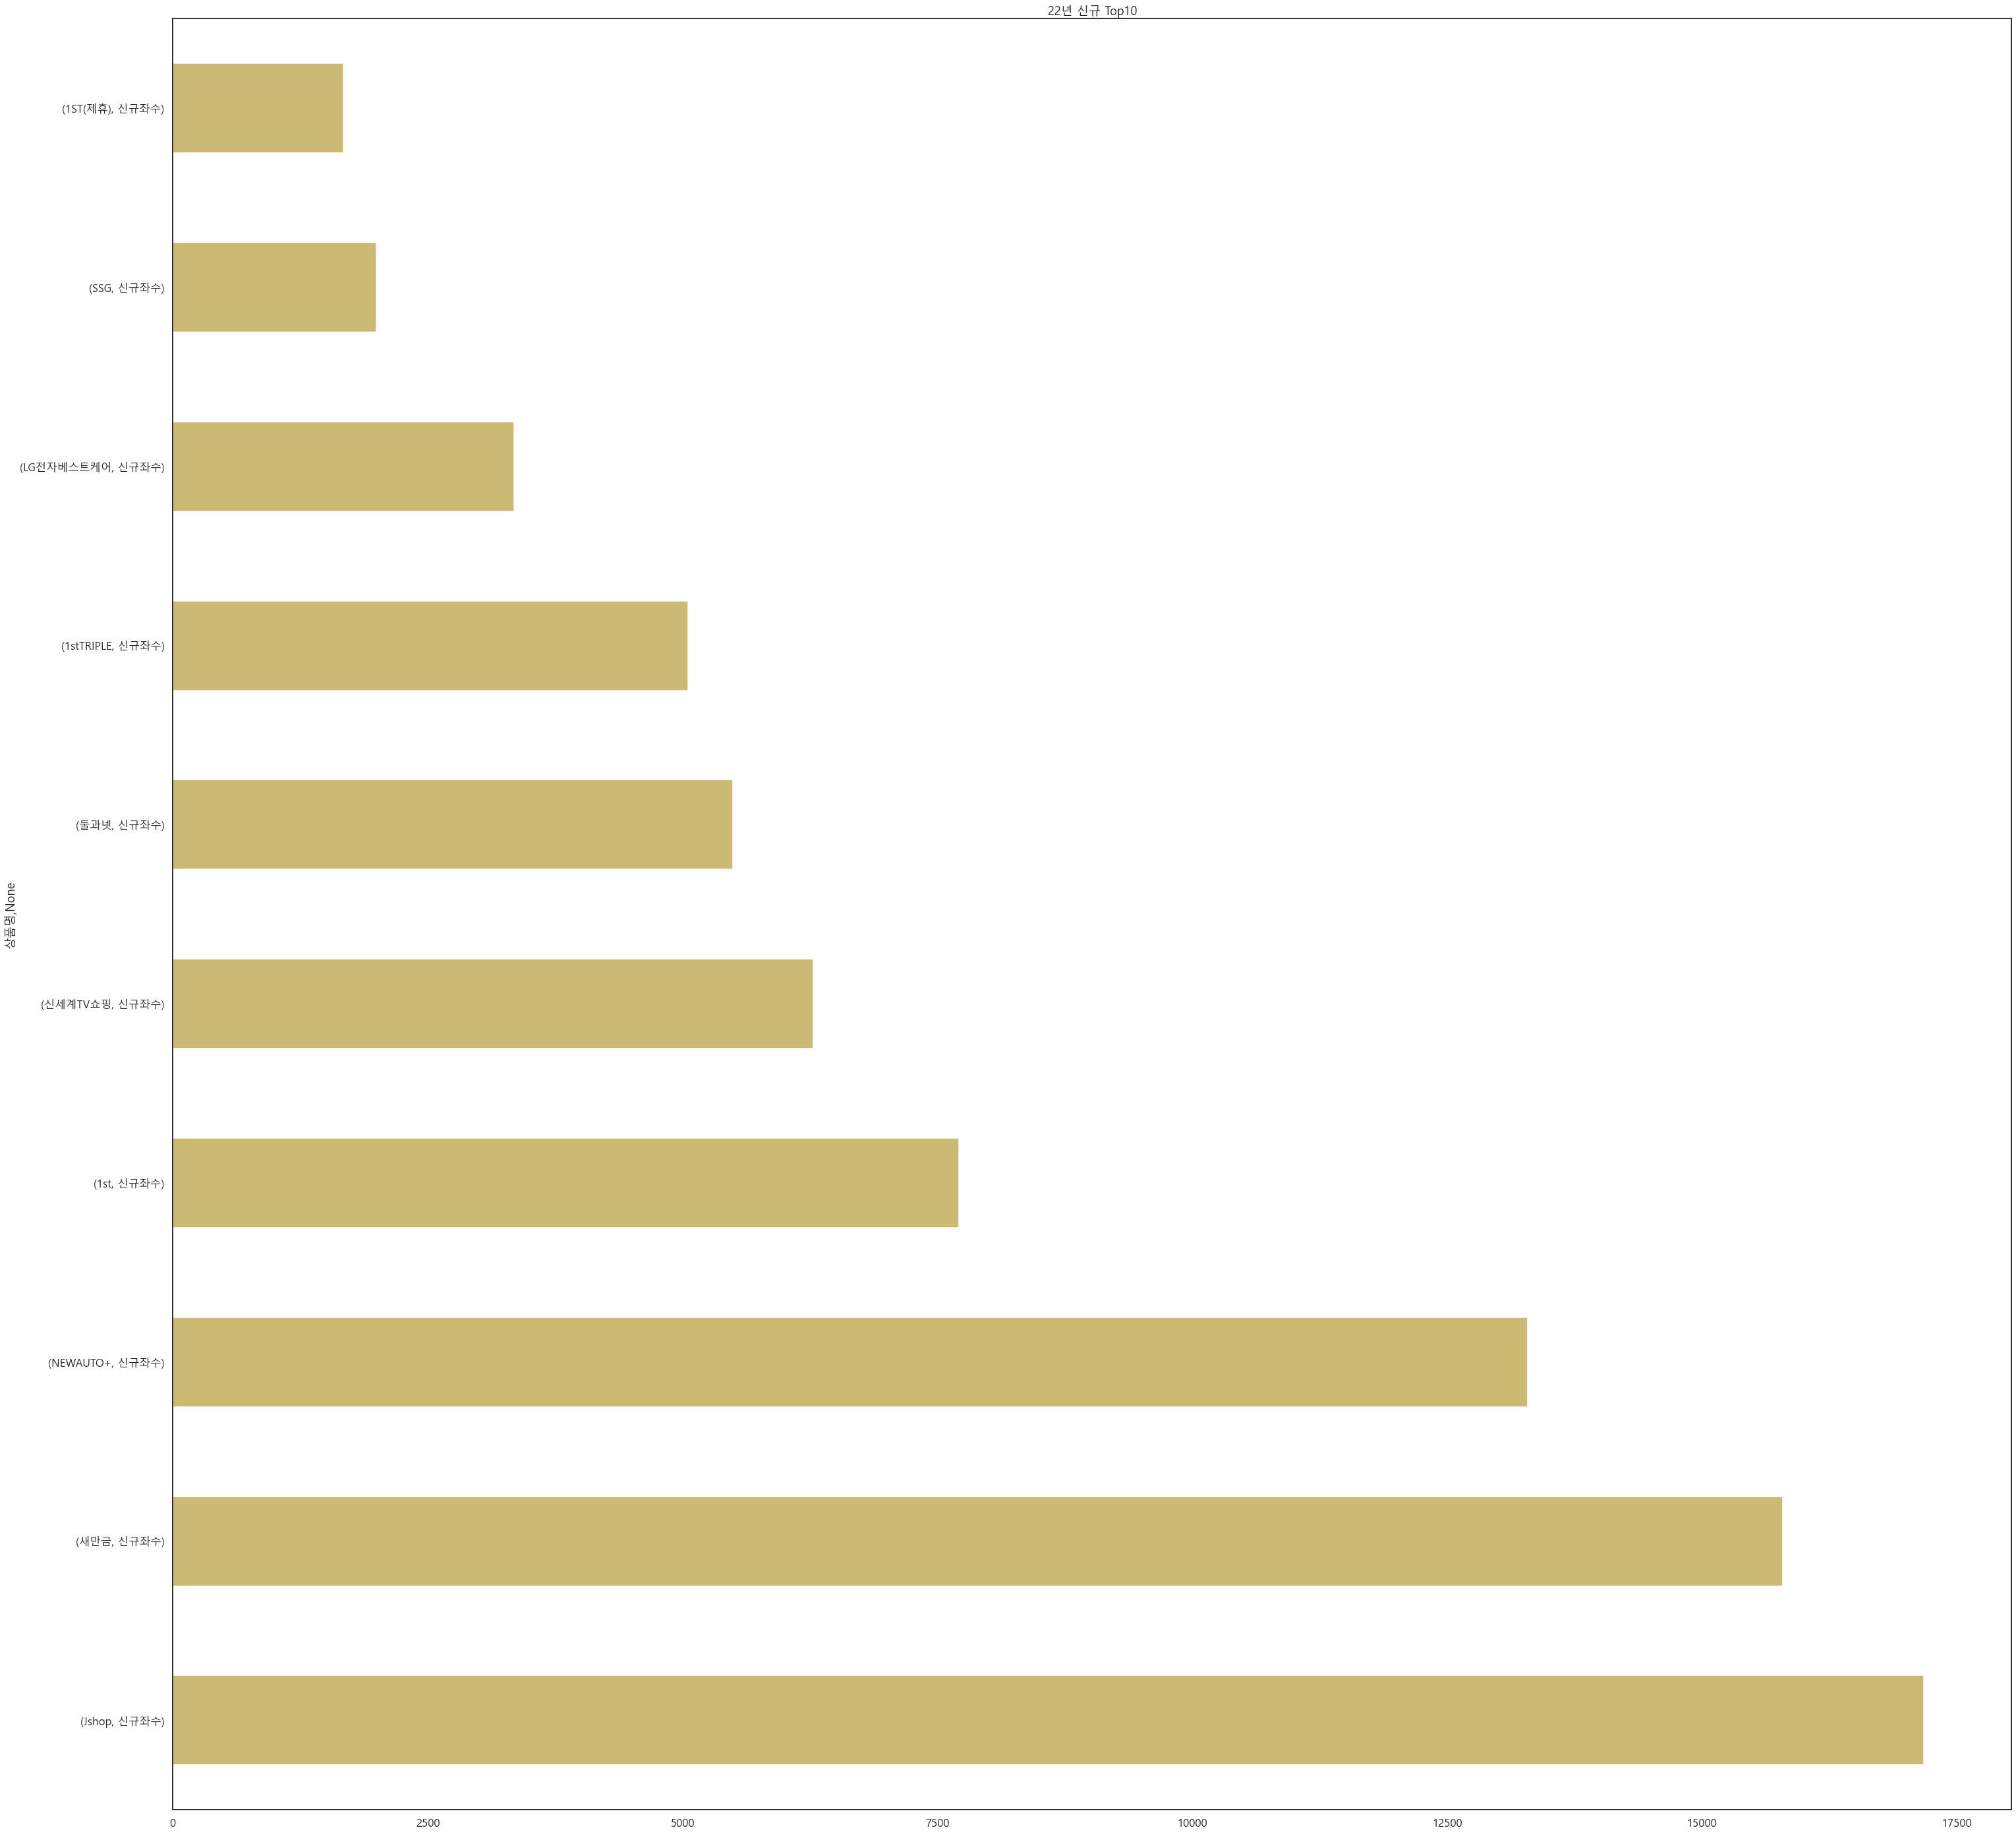

In [104]:
plt.title('22년 신규 Top10')
df_mer3.sort_values(ascending=False).head(10).plot(kind='barh', color='y')
plt.rcParams['font.size']=50
plt.show()